In [29]:
import torch
import torchvision
import torchvision.transforms as transforms

In [38]:
transform = transforms.Compose(
    [
     torchvision.transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [39]:
len(trainset)

50000

In [40]:
len(testset)

10000

In [42]:
trainset

AttributeError: 'CIFAR10' object has no attribute 'shape'

In [43]:
import matplotlib.pyplot as plt
import numpy as np

TypeError: Invalid shape (32, 32, 1) for image data

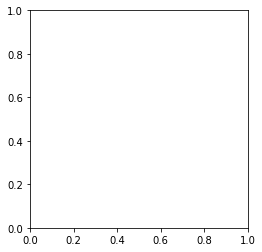

In [47]:
def imshow(img):
    img = img      # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(trainset[0][0])

In [49]:
trainset[0][0]

tensor([[[-0.5216, -0.6471, -0.6235,  ...,  0.0745,  0.0196,  0.0118],
         [-0.8510, -1.0000, -0.9216,  ..., -0.2549, -0.2941, -0.2627],
         [-0.8118, -0.9294, -0.7569,  ..., -0.2941, -0.2863, -0.3725],
         ...,
         [ 0.3569,  0.2078,  0.2314,  ...,  0.0510, -0.7176, -0.7020],
         [ 0.1451,  0.0118,  0.1294,  ...,  0.2000, -0.4588, -0.5294],
         [ 0.1843,  0.0745,  0.1529,  ...,  0.4824, -0.0275, -0.2235]]])

In [50]:
def split_indices(n, val_pct):
    # Determine size of validation set
    n_val = int(val_pct*n)
    # Create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [51]:
train_x, val_x = split_indices(len(trainset), val_pct=0.2)

In [52]:
print(len(train_x), len(val_x))

40000 10000


In [53]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [54]:
batch_size=100

# Training sampler and data loader
x_train = SubsetRandomSampler(train_x)
train_loader = DataLoader(trainset, 
                          batch_size, 
                          sampler=x_train)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_x)
val_loader = DataLoader(trainset,
                        batch_size, 
                        sampler=val_sampler)

In [55]:
import torch.nn as nn

input_size = 32*32
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [56]:
print(model.weight.shape)
model.weight

torch.Size([10, 1024])


Parameter containing:
tensor([[-0.0219, -0.0086, -0.0085,  ..., -0.0233,  0.0181,  0.0089],
        [-0.0279,  0.0306,  0.0154,  ..., -0.0039, -0.0234, -0.0143],
        [ 0.0033,  0.0149, -0.0070,  ...,  0.0253, -0.0018,  0.0027],
        ...,
        [ 0.0115,  0.0212, -0.0155,  ..., -0.0193, -0.0179,  0.0158],
        [ 0.0205, -0.0013,  0.0065,  ...,  0.0066, -0.0171,  0.0054],
        [-0.0114,  0.0012,  0.0094,  ...,  0.0078, -0.0002, -0.0055]],
       requires_grad=True)

In [57]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0076, -0.0311, -0.0066, -0.0017, -0.0138, -0.0146, -0.0089,  0.0002,
        -0.0103,  0.0056], requires_grad=True)

In [59]:
class cifar10model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 1024)
        out = self.linear(xb)
        return out
    
model = cifar10model()

In [60]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 1024]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0163, -0.0194, -0.0034,  ...,  0.0003,  0.0180, -0.0097],
         [-0.0049,  0.0129, -0.0051,  ..., -0.0174, -0.0256,  0.0092],
         [ 0.0139,  0.0293, -0.0094,  ..., -0.0021, -0.0264, -0.0189],
         ...,
         [-0.0286, -0.0277, -0.0031,  ...,  0.0277, -0.0167,  0.0265],
         [ 0.0250, -0.0018,  0.0137,  ...,  0.0102,  0.0179,  0.0120],
         [-0.0064,  0.0250,  0.0129,  ...,  0.0167, -0.0287, -0.0175]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0213,  0.0266,  0.0158,  0.0064,  0.0204,  0.0274,  0.0123, -0.0099,
          0.0078, -0.0125], requires_grad=True)]

In [61]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[ 0.0390,  0.4076, -0.1328, -0.3599,  0.1218, -0.6445, -0.4010, -0.7043,
         -1.0400,  0.2860],
        [-0.6273,  0.2828,  0.0940, -0.2232,  0.1936,  0.4154, -0.3638, -0.1598,
          0.3088, -0.0874]])


In [62]:
import torch.nn.functional as F


In [63]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1206, 0.1744, 0.1016, 0.0810, 0.1310, 0.0609, 0.0777, 0.0574, 0.0410,
         0.1544],
        [0.0518, 0.1287, 0.1065, 0.0776, 0.1177, 0.1469, 0.0674, 0.0826, 0.1320,
         0.0888]])
Sum:  0.9999999403953552


In [64]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 5, 0, 8, 1, 2, 0, 8, 2, 1, 8, 1, 8, 2, 8, 7, 0, 7, 4, 8, 8, 9, 8, 0,
        8, 5, 3, 1, 5, 8, 5, 8, 8, 7, 7, 5, 3, 7, 3, 1, 1, 5, 1, 1, 1, 3, 5, 2,
        3, 7, 9, 0, 1, 5, 0, 1, 7, 8, 2, 0, 3, 0, 5, 6, 4, 9, 2, 1, 8, 0, 1, 4,
        0, 0, 0, 5, 8, 0, 7, 1, 6, 8, 6, 5, 0, 2, 0, 9, 0, 6, 0, 4, 4, 1, 8, 6,
        9, 3, 9, 3])
tensor([0.1744, 0.1469, 0.2101, 0.1440, 0.1248, 0.1195, 0.1323, 0.1339, 0.1384,
        0.1357, 0.1899, 0.1293, 0.1448, 0.1306, 0.1388, 0.1315, 0.1257, 0.1329,
        0.1371, 0.1374, 0.1405, 0.1628, 0.1357, 0.1270, 0.1364, 0.1535, 0.1737,
        0.1617, 0.1155, 0.1280, 0.1373, 0.1468, 0.1533, 0.1458, 0.1378, 0.1665,
        0.1425, 0.1724, 0.1348, 0.1231, 0.2116, 0.1371, 0.1175, 0.1509, 0.1394,
        0.1253, 0.1364, 0.1156, 0.1232, 0.1206, 0.1295, 0.1612, 0.1463, 0.1341,
        0.1238, 0.1205, 0.1303, 0.1637, 0.1402, 0.1326, 0.1767, 0.1298, 0.1337,
        0.1478, 0.1281, 0.1559, 0.1407, 0.1262, 0.1318, 0.1572, 0.1710, 0.1446,
        0.1305, 0.1

In [65]:
labels

tensor([3, 1, 9, 0, 1, 5, 7, 5, 8, 2, 9, 2, 5, 0, 4, 7, 9, 1, 1, 6, 1, 4, 4, 5,
        4, 3, 2, 0, 5, 4, 6, 9, 4, 6, 4, 9, 4, 3, 7, 4, 1, 7, 2, 8, 4, 0, 3, 0,
        4, 9, 7, 9, 6, 7, 5, 0, 1, 6, 9, 9, 9, 8, 1, 0, 2, 7, 0, 7, 6, 9, 9, 2,
        0, 3, 8, 6, 2, 6, 7, 8, 2, 6, 1, 6, 7, 4, 9, 2, 4, 8, 8, 3, 6, 3, 4, 0,
        4, 4, 3, 4])

In [66]:
def accuracy(l1, l2):
    return torch.sum(l1 == l2).item() / len(l1)

In [67]:
accuracy(preds, labels)


0.06

In [68]:
loss_fn = F.cross_entropy


In [69]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3410, grad_fn=<NllLossBackward>)


In [70]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [71]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # Calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb)
                     
    if opt is not None:
        # Compute gradients
        loss.backward()
        # Update parameters             
        opt.step()
        # Reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        # Compute the metric
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

In [72]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                   for xb,yb in valid_dl]
        # Separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # Total size of the dataset
        total = np.sum(nums)
        # Avg. loss across batches 
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # Avg. of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [73]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [74]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3382, Accuracy: 0.0924


In [75]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        # Training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # Print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                  .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [76]:
model = cifar10model()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [77]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 2.1525, accuracy: 0.2290
Epoch [2/5], Loss: 2.1131, accuracy: 0.2513
Epoch [3/5], Loss: 2.0938, accuracy: 0.2595
Epoch [4/5], Loss: 2.0811, accuracy: 0.2670
Epoch [5/5], Loss: 2.0722, accuracy: 0.2727


In [78]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 2.0655, accuracy: 0.2767
Epoch [2/5], Loss: 2.0603, accuracy: 0.2794
Epoch [3/5], Loss: 2.0557, accuracy: 0.2826
Epoch [4/5], Loss: 2.0518, accuracy: 0.2859
Epoch [5/5], Loss: 2.0489, accuracy: 0.2880


In [79]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 2.0461, accuracy: 0.2892
Epoch [2/5], Loss: 2.0438, accuracy: 0.2914
Epoch [3/5], Loss: 2.0418, accuracy: 0.2930
Epoch [4/5], Loss: 2.0395, accuracy: 0.2957
Epoch [5/5], Loss: 2.0378, accuracy: 0.2959


In [80]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)


Epoch [1/5], Loss: 2.0365, accuracy: 0.2972
Epoch [2/5], Loss: 2.0350, accuracy: 0.2984
Epoch [3/5], Loss: 2.0338, accuracy: 0.2984
Epoch [4/5], Loss: 2.0324, accuracy: 0.3004
Epoch [5/5], Loss: 2.0316, accuracy: 0.2999


In [81]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)


Epoch [1/5], Loss: 2.0304, accuracy: 0.3001
Epoch [2/5], Loss: 2.0293, accuracy: 0.3004
Epoch [3/5], Loss: 2.0284, accuracy: 0.3012
Epoch [4/5], Loss: 2.0278, accuracy: 0.3000
Epoch [5/5], Loss: 2.0271, accuracy: 0.3013


In [ ]:
accuracies = [0.2290, 0.2513, 0.2595, 0.2670, 0.2727, 
              0.2767, 0.2794, 0.2826, 0.2859, 0.2880, 
              0.2892, 0.2914, 0.2930, 0.2957, 0.8450,
              0.8465, 0.8484, 0.8498, 0.8514, 0.8530]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');